# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

from tsfresh import select_features, extract_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns
from tsfresh.feature_extraction import settings

In [2]:
from etna.datasets import TSDataset

/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/etna/settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/etna/settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/etna/settings.py:53: UserWarning: etna[prophet] is not available, to install it, run `pip install etna[prophet]`
  warnings.warn("etna[prophet] is not available, to install it, run `pip install etna[prophet]`")
/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/etna/settings.py:62: UserWarning: etna[classification] is not available, to install it, run `pip install et

In [20]:
from etna.transforms import HolidayTransform
from etna.transforms import MeanTransform
from etna.transforms import LagTransform
from etna.transforms import DateFlagsTransform
from etna.pipeline import Pipeline
from etna.models import LinearPerSegmentModel
from etna.metrics import SMAPE

# Data preparation

In [4]:
data = pd.read_csv('data1.csv')

In [5]:
display(data)

date                             st_id  \
0        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
1        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
3        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
4        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
...             ...                               ...   
2124667  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124668  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124669  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124670  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124671  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   

                                pr_sku_id  pr_sales_type_id  price  \
0        0045ebdb1069ff4b3dd3efe628c39cd3                 0    0.0   
1        005c52de11abaf8e0a9714b24415ce34                 0    0.0   
2        00661699f543753ec7e911a64b9fd2f6                 0  435.0   
3        0094042bfeae507dc7f62acc8e5ed03a                 1  191.5   
4        0120fa9d93da50a73a6f61838b49ff46                 0    0.0   
...                                   ...               ...    ...   
2124667  fe50ae64d08d4f8245aaabc55d1baf79                 1  143.2   
2124668  fe5d18ae6650335830e4c1dbd9e6ddb9                 0    0.0   
2124669  ff1f1e5d2708809c03d03ff8b689030b                 0    0.0   
2124670  ff5cb535afe362f766ca6bd5d8e92e88                 0   46.0   
2124671  ff62e7bffaca5e0ac8029cd29298c8c3                 0    0.0   

         total_sales                        st_city_id  \
0                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
1                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2                1.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
3                6.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
4                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
...              ...                               ...   
2124667          5.0  885fe656777008c335ac96072a45be15   
2124668          0.0  885fe656777008c335ac96072a45be15   
2124669          0.0  885fe656777008c335ac96072a45be15   
2124670          3.0  885fe656777008c335ac96072a45be15   
2124671          0.0  885fe656777008c335ac96072a45be15   

                         st_division_code  st_type_format_id  st_type_loc_id  \
0        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
1        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
2        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
3        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
4        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
...                                   ...                ...             ...   
2124667  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124668  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124669  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124670  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124671  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   

         st_type_size_id  st_is_active  sales_total  \
0                      8             1     143898.0   
1                      8             1     143898.0   
2                      8             1     143898.0   
3                      8             1     143898.0   
4                      8             1     143898.0   
...                  ...           ...          ...   
2124667               12             1     100699.0   
2124668               12             1     100699.0   
2124669               12             1     100699.0   
2124670               12             1     100699.0   
2124671               12             1     100699.0   

                              pr_group_id                         pr_cat_id  \
0        c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
1        c20

In [6]:
data.sort_values(by=['date', 'st_id', 'pr_sku_id'], ascending = False) 
display(data)

date                             st_id  \
0        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
1        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
3        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
4        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
...             ...                               ...   
2124667  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124668  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124669  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124670  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124671  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   

                                pr_sku_id  pr_sales_type_id  price  \
0        0045ebdb1069ff4b3dd3efe628c39cd3                 0    0.0   
1        005c52de11abaf8e0a9714b24415ce34                 0    0.0   
2        00661699f543753ec7e911a64b9fd2f6                 0  435.0   
3        0094042bfeae507dc7f62acc8e5ed03a                 1  191.5   
4        0120fa9d93da50a73a6f61838b49ff46                 0    0.0   
...                                   ...               ...    ...   
2124667  fe50ae64d08d4f8245aaabc55d1baf79                 1  143.2   
2124668  fe5d18ae6650335830e4c1dbd9e6ddb9                 0    0.0   
2124669  ff1f1e5d2708809c03d03ff8b689030b                 0    0.0   
2124670  ff5cb535afe362f766ca6bd5d8e92e88                 0   46.0   
2124671  ff62e7bffaca5e0ac8029cd29298c8c3                 0    0.0   

         total_sales                        st_city_id  \
0                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
1                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2                1.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
3                6.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
4                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
...              ...                               ...   
2124667          5.0  885fe656777008c335ac96072a45be15   
2124668          0.0  885fe656777008c335ac96072a45be15   
2124669          0.0  885fe656777008c335ac96072a45be15   
2124670          3.0  885fe656777008c335ac96072a45be15   
2124671          0.0  885fe656777008c335ac96072a45be15   

                         st_division_code  st_type_format_id  st_type_loc_id  \
0        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
1        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
2        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
3        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
4        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
...                                   ...                ...             ...   
2124667  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124668  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124669  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124670  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124671  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   

         st_type_size_id  st_is_active  sales_total  \
0                      8             1     143898.0   
1                      8             1     143898.0   
2                      8             1     143898.0   
3                      8             1     143898.0   
4                      8             1     143898.0   
...                  ...           ...          ...   
2124667               12             1     100699.0   
2124668               12             1     100699.0   
2124669               12             1     100699.0   
2124670               12             1     100699.0   
2124671               12             1     100699.0   

                              pr_group_id                         pr_cat_id  \
0        c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
1        c20

## День недели, месяц, сезон

In [ ]:
Этна может сама

## сегментация

In [7]:
data["segment"] = data["st_id"] + "_" + data["pr_sku_id"]
data["segment"].unique()
data['segment'].value_counts()

16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3    352
c81e728d9d4c2f636f067f89cc14862c_bff51290445aa3a0039eafd4c709de8f    352
c81e728d9d4c2f636f067f89cc14862c_c262222092ac2de460cc1327a41b492b    352
c81e728d9d4c2f636f067f89cc14862c_c24c65259d90ed4a19ab37b6fd6fe716    352
c81e728d9d4c2f636f067f89cc14862c_c1aa413992e82db7cd2e8fc1ff5a3ad5    352
                                                                    ... 
42a0e188f5033bc65bf8d78622277c4e_ce594d50580ad4bb23826e7b8be5e15f    352
42a0e188f5033bc65bf8d78622277c4e_ce429dec957b9d6f3658eaa343fc40f0    352
42a0e188f5033bc65bf8d78622277c4e_ce35a682cd1d796eb93d2863c6c55010    352
42a0e188f5033bc65bf8d78622277c4e_cda72490a16c471e7a192a956f476e95    352
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3    352
Name: segment, Length: 6036, dtype: int64

In [8]:
display(data)

date                             st_id  \
0        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
1        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
2        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
3        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
4        2022-08-01  16a5cdae362b8d27a1d8f8c7b78b4330   
...             ...                               ...   
2124667  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124668  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124669  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124670  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   
2124671  2023-07-18  fa7cdfad1a5aaf8370ebeda47a1ff1c3   

                                pr_sku_id  pr_sales_type_id  price  \
0        0045ebdb1069ff4b3dd3efe628c39cd3                 0    0.0   
1        005c52de11abaf8e0a9714b24415ce34                 0    0.0   
2        00661699f543753ec7e911a64b9fd2f6                 0  435.0   
3        0094042bfeae507dc7f62acc8e5ed03a                 1  191.5   
4        0120fa9d93da50a73a6f61838b49ff46                 0    0.0   
...                                   ...               ...    ...   
2124667  fe50ae64d08d4f8245aaabc55d1baf79                 1  143.2   
2124668  fe5d18ae6650335830e4c1dbd9e6ddb9                 0    0.0   
2124669  ff1f1e5d2708809c03d03ff8b689030b                 0    0.0   
2124670  ff5cb535afe362f766ca6bd5d8e92e88                 0   46.0   
2124671  ff62e7bffaca5e0ac8029cd29298c8c3                 0    0.0   

         total_sales                        st_city_id  \
0                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
1                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2                1.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
3                6.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
4                0.0  c1f75cc0f7fe269dd0fd9bd5e24f9586   
...              ...                               ...   
2124667          5.0  885fe656777008c335ac96072a45be15   
2124668          0.0  885fe656777008c335ac96072a45be15   
2124669          0.0  885fe656777008c335ac96072a45be15   
2124670          3.0  885fe656777008c335ac96072a45be15   
2124671          0.0  885fe656777008c335ac96072a45be15   

                         st_division_code  st_type_format_id  st_type_loc_id  \
0        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
1        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
2        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
3        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
4        296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
...                                   ...                ...             ...   
2124667  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124668  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124669  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124670  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
2124671  296bd0cc6e735f9d7488ebc8fbc19130                  1               1   

         st_type_size_id  st_is_active  sales_total  \
0                      8             1     143898.0   
1                      8             1     143898.0   
2                      8             1     143898.0   
3                      8             1     143898.0   
4                      8             1     143898.0   
...                  ...           ...          ...   
2124667               12             1     100699.0   
2124668               12             1     100699.0   
2124669               12             1     100699.0   
2124670               12             1     100699.0   
2124671               12             1     100699.0   

                              pr_group_id                         pr_cat_id  \
0        c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
1        c20

In [9]:
data = data.rename(columns={"date":"timestamp", "total_sales":"target"})

data = data.drop(columns=["st_id", "pr_sku_id", "sales_total"])
data

timestamp  pr_sales_type_id  price  target  \
0        2022-08-01                 0    0.0     0.0   
1        2022-08-01                 0    0.0     0.0   
2        2022-08-01                 0  435.0     1.0   
3        2022-08-01                 1  191.5     6.0   
4        2022-08-01                 0    0.0     0.0   
...             ...               ...    ...     ...   
2124667  2023-07-18                 1  143.2     5.0   
2124668  2023-07-18                 0    0.0     0.0   
2124669  2023-07-18                 0    0.0     0.0   
2124670  2023-07-18                 0   46.0     3.0   
2124671  2023-07-18                 0    0.0     0.0   

                               st_city_id                  st_division_code  \
0        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
1        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
2        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
3        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
4        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
...                                   ...                               ...   
2124667  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124668  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124669  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124670  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124671  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   

         st_type_format_id  st_type_loc_id  st_type_size_id  st_is_active  \
0                        1               2                8             1   
1                        1               2                8             1   
2                        1               2                8             1   
3                        1               2                8             1   
4                        1               2                8             1   
...                    ...             ...              ...           ...   
2124667                  1               1               12             1   
2124668                  1               1               12             1   
2124669                  1               1               12             1   
2124670                  1               1               12             1   
2124671                  1               1               12             1   

                              pr_group_id                         pr_cat_id  \
0        c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
1        c20ad4d76fe97759aa27a0c99bff6710  fb2fcd534b0ff3bbed73cc51df620323   
2        aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
3        6512bd43d9caa6e02c990b0a82652dca  e58cc5ca94270acaceed13bc82dfedf7   
4        aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
...                                   ...                               ...   
2124667  aab3238922bcc25a6f606eb525ffdc56  28fc2782ea7ef51c1104ccf7b9bea13d   
2124668  aab3238922bcc25a6f606eb525ffdc56  3de2334a314a7a72721f1f74a6cb4cee   
2124669  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   
2124670  aab3238922bcc25a6f606eb525ffdc56  28fc2782ea7ef51c1104ccf7b9bea13d   
2124671  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   

                             pr_subcat_id  pr_uom_id  is_holiday  \
0        130d817d8b3f616e97c555ec57946aec          1           0   
1        572494dd9d43f96629bddcbd4102f35f          1           0   
2        8afe22eeb3f3f68de994a3c60388858c          1           0   
3        c93c26cd49ea08e6b8984351d4164575          1           0   
4        a98ba70a6aaa1d3da549927a4ca79dfa         17           0   
...                                   ...        ...         ...   
2124667  b3e70d072fc648f6934c288e44f5c

## ETNA FORMAT

In [10]:
data_in_etna_format = TSDataset.to_dataset(data)
data_in_etna_format.head()

segment    16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-02  c559da2ba967eb820766939a658022c8   
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-04  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf                0   

segment                                                       \
feature                         pr_subcat_id pr_uom_id price   
timestamp                                                      
2022-08-01  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-02  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-03  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-04  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-05  130d817d8b3f616e97c555ec57946aec         1   0.0   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-02  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-03  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-04  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-05  c1f75cc0f7fe269dd0fd9bd5e24f9586   

segment                                                    ...  \
feature                     st_division_code st_is_active  ...   
timestamp                                                  ...   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-02  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-03  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-04  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-05  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3  \
feature                                                         pr_subcat_id   
timestamp                                                                      
2022-08-01                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-02                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-03                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-04                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-05                   68f204f3838bfee4ada868b66e6a0814                  

segment                                                       \
feature    pr_uom_id price                        st_city_id   
timestamp                                                      
2022-08-01        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-02        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-03        17  23.8  885fe656777008c335ac96072a45be15   
2

In [11]:
ts = TSDataset(data_in_etna_format, freq="D")
ts.head()

segment    16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-02  c559da2ba967eb820766939a658022c8   
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-04  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf                0   

segment                                                       \
feature                         pr_subcat_id pr_uom_id price   
timestamp                                                      
2022-08-01  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-02  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-03  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-04  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-05  130d817d8b3f616e97c555ec57946aec         1   0.0   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-02  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-03  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-04  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-05  c1f75cc0f7fe269dd0fd9bd5e24f9586   

segment                                                    ...  \
feature                     st_division_code st_is_active  ...   
timestamp                                                  ...   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-02  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-03  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-04  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-05  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3  \
feature                                                         pr_subcat_id   
timestamp                                                                      
2022-08-01                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-02                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-03                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-04                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-05                   68f204f3838bfee4ada868b66e6a0814                  

segment                                                       \
feature    pr_uom_id price                        st_city_id   
timestamp                                                      
2022-08-01        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-02        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-03        17  23.8  885fe656777008c335ac96072a45be15   
2

In [12]:
ts[:,"fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3", :].head()

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-08-01  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-02  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-03  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-04  1bc0249a6412ef49b07fe6f62e6dc8de   
2022-08-05  1bc0249a6412ef49b07fe6f62e6dc8de   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf                1   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf                1   

segment                                                       \
feature                         pr_subcat_id pr_uom_id price   
timestamp                                                      
2022-08-01  68f204f3838bfee4ada868b66e6a0814        17   0.0   
2022-08-02  68f204f3838bfee4ada868b66e6a0814        17   0.0   
2022-08-03  68f204f3838bfee4ada868b66e6a0814        17  23.8   
2022-08-04  68f204f3838bfee4ada868b66e6a0814        17   0.0   
2022-08-05  68f204f3838bfee4ada868b66e6a0814        17  32.2   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  885fe656777008c335ac96072a45be15   
2022-08-02  885fe656777008c335ac96072a45be15   
2022-08-03  885fe656777008c335ac96072a45be15   
2022-08-04  885fe656777008c335ac96072a45be15   
2022-08-05  885fe656777008c335ac96072a45be15   

segment                                                                      \
feature                     st_division_code st_is_active st_type_format_id   
timestamp                                                                     
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130            1                 1   
2022-08-02  296bd0cc6e735f9d7488ebc8fbc19130            1                 1   
2022-08-03  296bd0cc6e735f9d7488ebc8fbc19130            1                 1   
2022-08-04  296bd0cc6e735f9d7488ebc8fbc19130            1                 1   
2022-08-05  296bd0cc6e735f9d7488ebc8fbc19130            1                 1   

segment                                           
feature    st_type_loc_id st_type_size_id target  
timestamp                                         
2022-08-01              1              12    0.0  
2022-08-02              1              12    0.0  
2022-08-03              1              12    4.0  
2022-08-04              1              12    0.0  
2022-08-05              1              12    9.0

In [13]:
ts.describe()

start_timestamp  \
segments                                                             
16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff...      2022-08-01   
16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf...      2022-08-01   
16a5cdae362b8d27a1d8f8c7b78b4330_00661699f54375...      2022-08-01   
16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae50...      2022-08-01   
16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50...      2022-08-01   
...                                                            ...   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f...      2022-08-01   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe5d18ae665033...      2022-08-01   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff1f1e5d270880...      2022-08-01   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff5cb535afe362...      2022-08-01   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e...      2022-08-01   

                                                   end_timestamp  length  \
segments                                                                   
16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff...    2023-07-18     352   
16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf...    2023-07-18     352   
16a5cdae362b8d27a1d8f8c7b78b4330_00661699f54375...    2023-07-18     352   
16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae50...    2023-07-18     352   
16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50...    2023-07-18     352   
...                                                          ...     ...   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f...    2023-07-18     352   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe5d18ae665033...    2023-07-18     352   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff1f1e5d270880...    2023-07-18     352   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff5cb535afe362...    2023-07-18     352   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e...    2023-07-18     352   

                                                    num_missing  num_segments  \
segments                                                                        
16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff...            0          6036   
16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf...            0          6036   
16a5cdae362b8d27a1d8f8c7b78b4330_00661699f54375...            0          6036   
16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae50...            0          6036   
16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50...            0          6036   
...                                                         ...           ...   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f...            0          6036   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe5d18ae665033...            0          6036   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff1f1e5d270880...            0          6036   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff5cb535afe362...            0          6036   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e...            0          6036   

                                                    num_exogs  num_regressors  \
segments                                                                        
16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff...         13               0   
16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf...         13               0   
16a5cdae362b8d27a1d8f8c7b78b4330_00661699f54375...         13               0   
16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae50...         13               0   
16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50...         13               0   
...                                                       ...             ...   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f...         13               0   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe5d18ae665033...         13               0   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff1f1e5d270880...         13               0   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff5cb535afe362...         13               0   
fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e...         13               0   

                                           

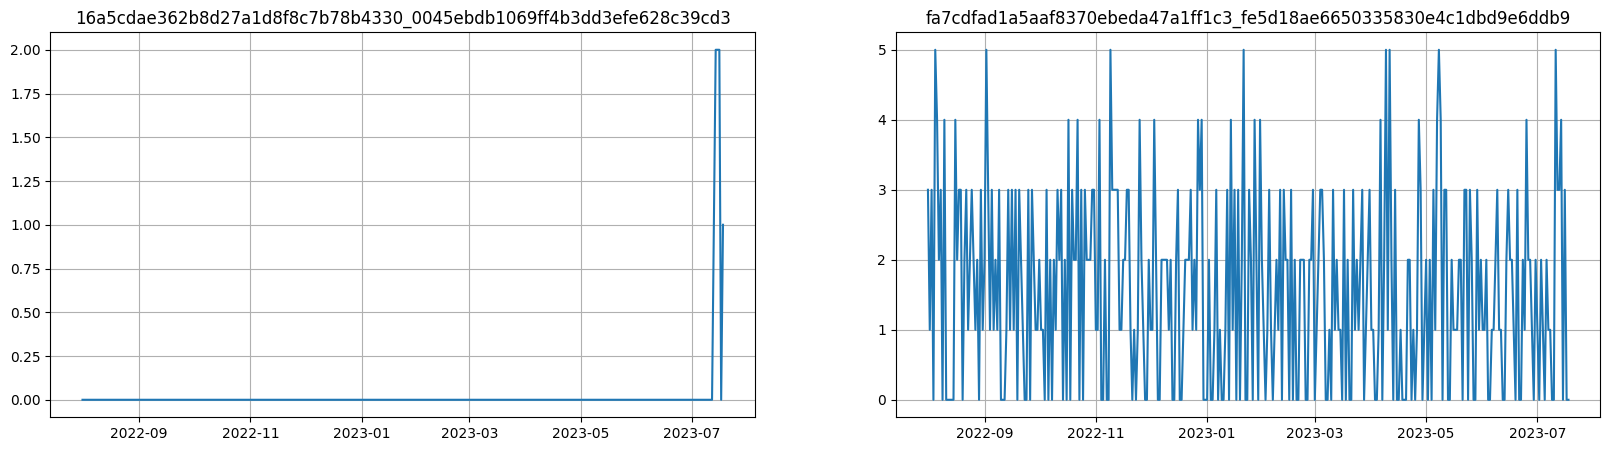

In [14]:

ts.plot(segments=("16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3", "fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe5d18ae6650335830e4c1dbd9e6ddb9"))

## Лагирование

In [15]:
lag_1 = LagTransform(in_column="target", out_column="lags", lags=[1])
ts_for_lags = TSDataset(data_in_etna_format, freq="D")
ts_for_lags.fit_transform([lag_1])

In [16]:
ts_for_lags[:"2023-01-05", "fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79", :]

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  
...                                                       ...                  
2023-01-01                                                  1                  
2023-01-02                                                  1                  
2023-01-03                                                  1                  
2023-01-04                                                  1                  
2023-01-05                                                  1                  

segment                                              \
feature    lags_1                         pr_cat_id   
timestamp                                             
2022-08-01    NaN  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-02    6.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-03    3.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-04   10.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-05    7.0  28fc2782ea7ef51c1104ccf7b9bea13d   
...           ...                               ...   
2023-01-01   88.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-02    1.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-03    3.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-04    4.0  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-05    1.0  28fc2782ea7ef51c1104ccf7b9bea13d   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-02  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-03  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-04  aab3238922bcc25a6f606eb525ffdc56                0   
2022-08-05  aab3238922bcc25a6f606eb525ffdc56                1   
...                                      ...              ...   
2023-01-01  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-02  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-03  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-04  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-05  aab3238922bcc25a6f606eb525ffdc56                0   

segment                                                        \
feature                         pr_subcat_id pr_uom_id  price   
timestamp                                                       
2022-08-01  b3e70d072fc648f6934c288e44f5c35e         1  133.7   
2022-08-02  b3e70d072fc648f6934c288e44f5c35e         1  124.0   
2022-08-03  b3e70d072fc648f6934c288e44f5c35e         1  133.7   
2022-08-04  b3e70d072fc648f6934c288e44f5c35e         1  162.6   
2022-08-05  b3e70d072fc648f6934c288e44f5c35e         1  150.5   
...                                      ...       ...    ...   
2023-01-01  b3e70d072fc648f6934c288e44f5c35e         1  163.0   
2023-01-02  b3e70d072fc648f6934c288e44f5c35e         1  160.7   
2023-01-03  b3e70d072fc648f6934c288e44f5c35e         1  159.2   
2023-01-04  b3e70d072fc648f6934c288e44f5c35e         1   80.0   
2023-01-05  b3e70d072fc648f6934c288e44f5c35e         1  169.3   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  885fe656777008c335ac96072a45be15   
2022-08-02  885fe656777008c335ac96072a45be15   
2022-08-03  885fe656777008c335ac96072a45be15  

In [17]:
lag_30_days = LagTransform(in_column="target", out_column="lags", lags=[1,3,7,14,30])
ts_for_lags = TSDataset(data_in_etna_format, freq="D")
ts_for_lags.fit_transform([lag_30_days])
ts_for_lags[:"2023-01-06", "fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79", :].tail(10)

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79  \
feature                                                           is_holiday   
timestamp                                                                      
2022-12-28                                                  0                  
2022-12-29                                                  1                  
2022-12-30                                                  1                  
2022-12-31                                                  1                  
2023-01-01                                                  1                  
2023-01-02                                                  1                  
2023-01-03                                                  1                  
2023-01-04                                                  1                  
2023-01-05                                                  1                  
2023-01-06                                                  1                  

segment                                          \
feature    lags_1 lags_14 lags_3 lags_30 lags_7   
timestamp                                         
2022-12-28    5.0    13.0    8.0     5.0    7.0   
2022-12-29   10.0     7.0    4.0     5.0    3.0   
2022-12-30   15.0     7.0    5.0     6.0    7.0   
2022-12-31   37.0     6.0   10.0     6.0   11.0   
2023-01-01   88.0    12.0   15.0     6.0    8.0   
2023-01-02    1.0    10.0   37.0    14.0    4.0   
2023-01-03    3.0     9.0   88.0     7.0    5.0   
2023-01-04    4.0     7.0    1.0     5.0   10.0   
2023-01-05    1.0     3.0    3.0     6.0   15.0   
2023-01-06    3.0     7.0    4.0     7.0   37.0   

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-12-28  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-12-29  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-12-30  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-12-31  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-01  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-02  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-03  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-04  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-05  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-01-06  28fc2782ea7ef51c1104ccf7b9bea13d   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-12-28  aab3238922bcc25a6f606eb525ffdc56                1   
2022-12-29  aab3238922bcc25a6f606eb525ffdc56                1   
2022-12-30  aab3238922bcc25a6f606eb525ffdc56                1   
2022-12-31  aab3238922bcc25a6f606eb525ffdc56                1   
2023-01-01  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-02  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-03  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-04  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-05  aab3238922bcc25a6f606eb525ffdc56                0   
2023-01-06  aab3238922bcc25a6f606eb525ffdc56                0   

segment                                                        \
feature                         pr_subcat_id pr_uom_id  price   
timestamp                                                       
2022-12-28  b3e70d072fc648f6934c288e44f5c35e         1  148.4   
2022-12-29  b3e70d072fc648f6934c288e44f5c35e         1  163.0   
2022-12-30  b3e70d072fc648f6934c288e44f5c35e         1  156.1   
2022-12-31  b3e70d072fc648f6934c288e44f5c35e         1  155.1   
2023-01-01  b3e70d072fc648f6934c288e44f5c35e         1  163.0   
2023-01-02  b3e70d072fc648f6934c288e44f5c35e         1  160.7   
2023-01-03  b3e70d072fc648f6934c288e44f5c35e         1  159.2   
2023-01-04  b3e70d072fc648f6934c288e44f5c35e         1   80.0   
2023-01-05  b3e70d072fc648f6934c288e44f5c35e         1  169.3   
2023-01-06  b3e70d072fc648f6934c288e44f5c35e

## Скользящая средняя

In [18]:
mean_tr = MeanTransform(in_column="target", out_column="mean", window=7, seasonality=2, alpha=0.5)
ts_mean = TSDataset(data_in_etna_format, freq="D")
ts_mean.fit_transform([mean_tr])
ts_mean[:"2022-11-10", "fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79", :]

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  
...                                                       ...                  
2022-11-06                                                  0                  
2022-11-07                                                  0                  
2022-11-08                                                  0                  
2022-11-09                                                  0                  
2022-11-10                                                  0                  

segment                                                 \
feature         mean                         pr_cat_id   
timestamp                                                
2022-08-01  6.000000  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-02  3.000000  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-03  6.500000  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-04  4.250000  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-08-05  4.833333  28fc2782ea7ef51c1104ccf7b9bea13d   
...              ...                               ...   
2022-11-06  3.618304  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-11-07  3.982143  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-11-08  2.794643  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-11-09  2.834821  28fc2782ea7ef51c1104ccf7b9bea13d   
2022-11-10  3.243304  28fc2782ea7ef51c1104ccf7b9bea13d   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-02  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-03  aab3238922bcc25a6f606eb525ffdc56                1   
2022-08-04  aab3238922bcc25a6f606eb525ffdc56                0   
2022-08-05  aab3238922bcc25a6f606eb525ffdc56                1   
...                                      ...              ...   
2022-11-06  aab3238922bcc25a6f606eb525ffdc56                1   
2022-11-07  aab3238922bcc25a6f606eb525ffdc56                1   
2022-11-08  aab3238922bcc25a6f606eb525ffdc56                1   
2022-11-09  aab3238922bcc25a6f606eb525ffdc56                1   
2022-11-10  aab3238922bcc25a6f606eb525ffdc56                1   

segment                                                        \
feature                         pr_subcat_id pr_uom_id  price   
timestamp                                                       
2022-08-01  b3e70d072fc648f6934c288e44f5c35e         1  133.7   
2022-08-02  b3e70d072fc648f6934c288e44f5c35e         1  124.0   
2022-08-03  b3e70d072fc648f6934c288e44f5c35e         1  133.7   
2022-08-04  b3e70d072fc648f6934c288e44f5c35e         1  162.6   
2022-08-05  b3e70d072fc648f6934c288e44f5c35e         1  150.5   
...                                      ...       ...    ...   
2022-11-06  b3e70d072fc648f6934c288e44f5c35e         1  111.8   
2022-11-07  b3e70d072fc648f6934c288e44f5c35e         1  114.2   
2022-11-08  b3e70d072fc648f6934c288e44f5c35e         1  123.1   
2022-11-09  b3e70d072fc648f6934c288e44f5c35e         1  114.2   
2022-11-10  b3e70d072fc648f6934c288e44f5c35e         1  121.5   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  885fe656777008c335ac96072a45be15   
2022-08-02  885fe656777008c335ac96072a45be15   
2022

## Маркеры дней

In [21]:
date_tr = DateFlagsTransform(out_column="date_flags", 
                             day_number_in_week=True,
                             day_number_in_month=True,
                             is_weekend=True,
                            )
date_flag_ts = TSDataset(data_in_etna_format, freq="D")
date_flag_ts.fit_transform([date_tr])
date_flag_ts[:"2023-02-10", "fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79", :].tail(10)

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_fe50ae64d08d4f8245aaabc55d1baf79  \
feature                                       date_flags_day_number_in_month   
timestamp                                                                      
2023-02-01                                                  1                  
2023-02-02                                                  2                  
2023-02-03                                                  3                  
2023-02-04                                                  4                  
2023-02-05                                                  5                  
2023-02-06                                                  6                  
2023-02-07                                                  7                  
2023-02-08                                                  8                  
2023-02-09                                                  9                  
2023-02-10                                                 10                  

segment                                                                    \
feature    date_flags_day_number_in_week date_flags_is_weekend is_holiday   
timestamp                                                                   
2023-02-01                             2                 False          0   
2023-02-02                             3                 False          0   
2023-02-03                             4                 False          0   
2023-02-04                             5                  True          0   
2023-02-05                             6                  True          0   
2023-02-06                             0                 False          0   
2023-02-07                             1                 False          0   
2023-02-08                             2                 False          0   
2023-02-09                             3                 False          0   
2023-02-10                             4                 False          0   

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2023-02-01  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-02  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-03  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-04  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-05  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-06  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-07  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-08  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-09  28fc2782ea7ef51c1104ccf7b9bea13d   
2023-02-10  28fc2782ea7ef51c1104ccf7b9bea13d   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2023-02-01  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-02  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-03  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-04  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-05  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-06  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-07  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-08  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-09  aab3238922bcc25a6f606eb525ffdc56                1   
2023-02-10  aab3238922bcc25a6f606eb525ffdc56                1   

segment                                                        \
feature                         pr_subcat_id pr_uom_id  price   
timestamp                                                       
2023-02-01  b3e70d072fc648f6934c288e44f5c35e         1  142.4   
2023-02-02  b3e70d072fc648f6934c288e44f5c35e         1  119.0   
2023-02-03  b3e70d072fc648f6934c288e44f5c35e         1  148.8   
2023-02-04  b3e70d072fc648f6934c288e44f5c35e         1  135.0   
2023-02-05  b3e70d072fc648f6934

## Все вместе

In [22]:
#lag_30_days = LagTransform(in_column="target", out_column="lags", lags=[1,3,7,14,30])
#mean_tr = MeanTransform(in_column="target", out_column="mean", window=7, seasonality=7, alpha=0.5)
#date_tr = DateFlagsTransform(out_column="date_flags", 
#                             day_number_in_week=True,
#                             day_number_in_month=True,
#                             is_weekend=True)
#
#model = LinearPerSegmentModel()
#pipe = Pipeline(model=model, transforms=[lag_30_days, mean_tr, date_tr])
#
#smape = SMAPE()
#
#metrics, forecast, info = pipe.backtest(ts=ts, metrics=[smape], n_folds=1)

In [23]:
#print(metrics, forecast, info)

In [24]:
#metrics['SMAPE'].mean()

## Кластеризация

In [25]:
from etna.clustering import EuclideanClustering

In [26]:
model = EuclideanClustering()
model.build_distance_matrix(ts)

### Попробуем сохранить модель и проверим работоспособность

In [146]:
import pickle


with open('etna_cluster.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Load the model back later
#with open('etna_cluster.pkl', 'rb') as model_file:
#   loaded_model = pickle.load(model_file)


In [148]:
with open('etna_cluster.pkl', 'rb') as model_file:
   loaded_model = pickle.load(model_file)

In [153]:
loaded_model.build_clustering_algo(n_clusters=100, linkage="complete")
segment2cluster100 = loaded_model.fit_predict()
segment2cluster100

/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


{'16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf8e0a9714b24415ce34': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_00661699f543753ec7e911a64b9fd2f6': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae507dc7f62acc8e5ed03a': 22,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50a73a6f61838b49ff46': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0169529ff660adcac9b7e354e0c4b882': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_01e4734745e97e52d3213449e1a05dd7': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_02713435f3587e2c81d8f6a9016763ea': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_028601bcf68af10f8be7422c22b5f6a6': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_033013f94a18c066e8b3d610bed34bee': 43,
 '16a5cdae362b8d27a1d8f8c7b78b4330_040a02c2ad1561cbcfc9cae5b4c4b73b': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0448c8afc036bb44c457d7e9edd74c50': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_04bbb07b1057b09d04209991f3eadd8f': 10,
 '16a5cdae362b8d27a1d8f8c7b78b4330_050

In [155]:
value_counts100 = {}
for value in segment2cluster100.values():
    if value in value_counts100:
        value_counts100[value] += 1
    else:
        value_counts100[value] = 1

print(value_counts100)

{10: 5527, 22: 36, 43: 27, 0: 4, 53: 1, 11: 2, 1: 148, 24: 5, 19: 5, 95: 1, 9: 13, 45: 14, 5: 24, 4: 2, 3: 10, 2: 55, 54: 1, 77: 1, 8: 8, 71: 1, 34: 5, 36: 10, 17: 16, 99: 1, 18: 8, 64: 1, 13: 5, 97: 1, 61: 1, 28: 2, 69: 2, 90: 1, 89: 2, 6: 6, 86: 1, 96: 1, 14: 6, 92: 1, 44: 2, 79: 1, 56: 1, 16: 3, 57: 1, 7: 2, 87: 1, 68: 1, 21: 6, 75: 1, 52: 1, 66: 1, 93: 1, 83: 1, 12: 2, 85: 1, 84: 1, 76: 2, 58: 1, 15: 2, 59: 1, 37: 2, 23: 2, 51: 1, 25: 1, 81: 1, 55: 1, 49: 2, 80: 1, 50: 1, 73: 1, 41: 1, 30: 2, 98: 1, 63: 1, 26: 1, 74: 1, 48: 1, 72: 1, 91: 1, 88: 1, 42: 1, 82: 1, 27: 1, 60: 1, 62: 2, 35: 1, 39: 1, 29: 1, 47: 2, 78: 1, 65: 1, 94: 1, 67: 1, 32: 1, 38: 1, 46: 1, 33: 1, 70: 2, 31: 1, 40: 1, 20: 1}


### Возвращаемся к кластеризации

In [142]:
model.build_clustering_algo(n_clusters=43, linkage="complete")

In [143]:
segment2cluster = model.fit_predict()
segment2cluster

/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


{'16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf8e0a9714b24415ce34': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_00661699f543753ec7e911a64b9fd2f6': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae507dc7f62acc8e5ed03a': 11,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50a73a6f61838b49ff46': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0169529ff660adcac9b7e354e0c4b882': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_01e4734745e97e52d3213449e1a05dd7': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_02713435f3587e2c81d8f6a9016763ea': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_028601bcf68af10f8be7422c22b5f6a6': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_033013f94a18c066e8b3d610bed34bee': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_040a02c2ad1561cbcfc9cae5b4c4b73b': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0448c8afc036bb44c457d7e9edd74c50': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_04bbb07b1057b09d04209991f3eadd8f': 9,
 '16a5cdae362b8d27a1d8f8c7b78b4330_050a8120e2a3b87

In [144]:
value_counts = {}
for value in segment2cluster.values():
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

print(value_counts)

{9: 5564, 11: 212, 4: 21, 0: 66, 7: 56, 3: 8, 23: 1, 34: 28, 26: 1, 5: 12, 35: 1, 8: 9, 24: 1, 14: 2, 30: 1, 2: 3, 13: 5, 1: 6, 17: 4, 39: 1, 10: 3, 37: 1, 6: 2, 41: 1, 42: 1, 28: 1, 15: 3, 29: 1, 25: 1, 40: 1, 27: 1, 36: 1, 18: 4, 31: 1, 12: 2, 22: 1, 21: 1, 16: 3, 19: 1, 38: 1, 33: 1, 32: 1, 20: 1}


In [48]:
#import json
#file_path = 'segment2cluster.json'

# Open the file in write mode and save the dictionary as JSON
#with open(file_path, 'w') as json_file:
#    json.dump(segment2cluster, json_file)
#
#print(f'Saved the dictionary to {file_path}')

In [145]:
segment2cluster = {k: int(v) for k, v in segment2cluster.items()}

# Specify the file path where you want to save the dictionary
file_path = 'segment2cluster_43.json'

# Open the file in write mode and save the dictionary as JSON
with open(file_path, 'w') as json_file:
    json.dump(segment2cluster, json_file)

print(f'Saved the dictionary to {file_path}')

Saved the dictionary to segment2cluster_43.json


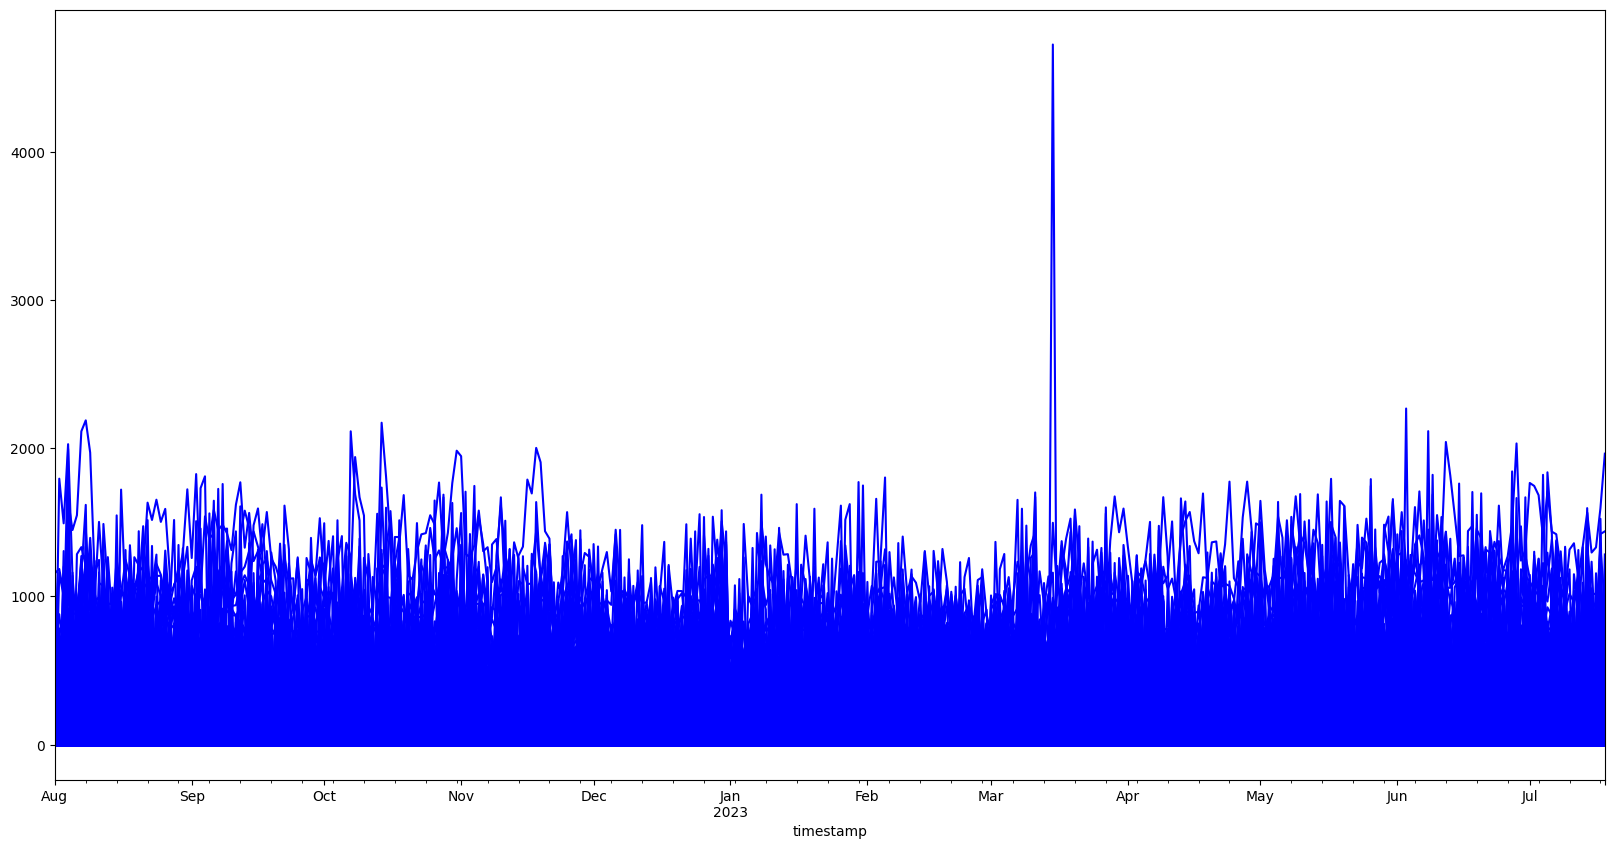

In [35]:
colores = ["r", "g", "b", "y", "m", "c"]
color = [colores[i] for i in segment2cluster.values()]
ts.df.plot(figsize=(20, 10), color=color, legend=False);

In [36]:
from etna.analysis import plot_clusters

In [37]:
centroids = model.get_centroids()
centroids.head()

cluster             0      1         2      3      4      5
feature        target target    target target target target
timestamp                                                  
2022-08-01  55.760417    0.0  1.412978    0.0    0.0   89.5
2022-08-02  58.416667    0.0  1.560320    0.0    0.0   89.5
2022-08-03  60.885417    0.0  1.557828    0.0    0.0   89.5
2022-08-04  56.385417    0.0  1.881354    0.0    0.0   80.0
2022-08-05  65.843750    0.0  2.417566    0.0    0.0  105.5

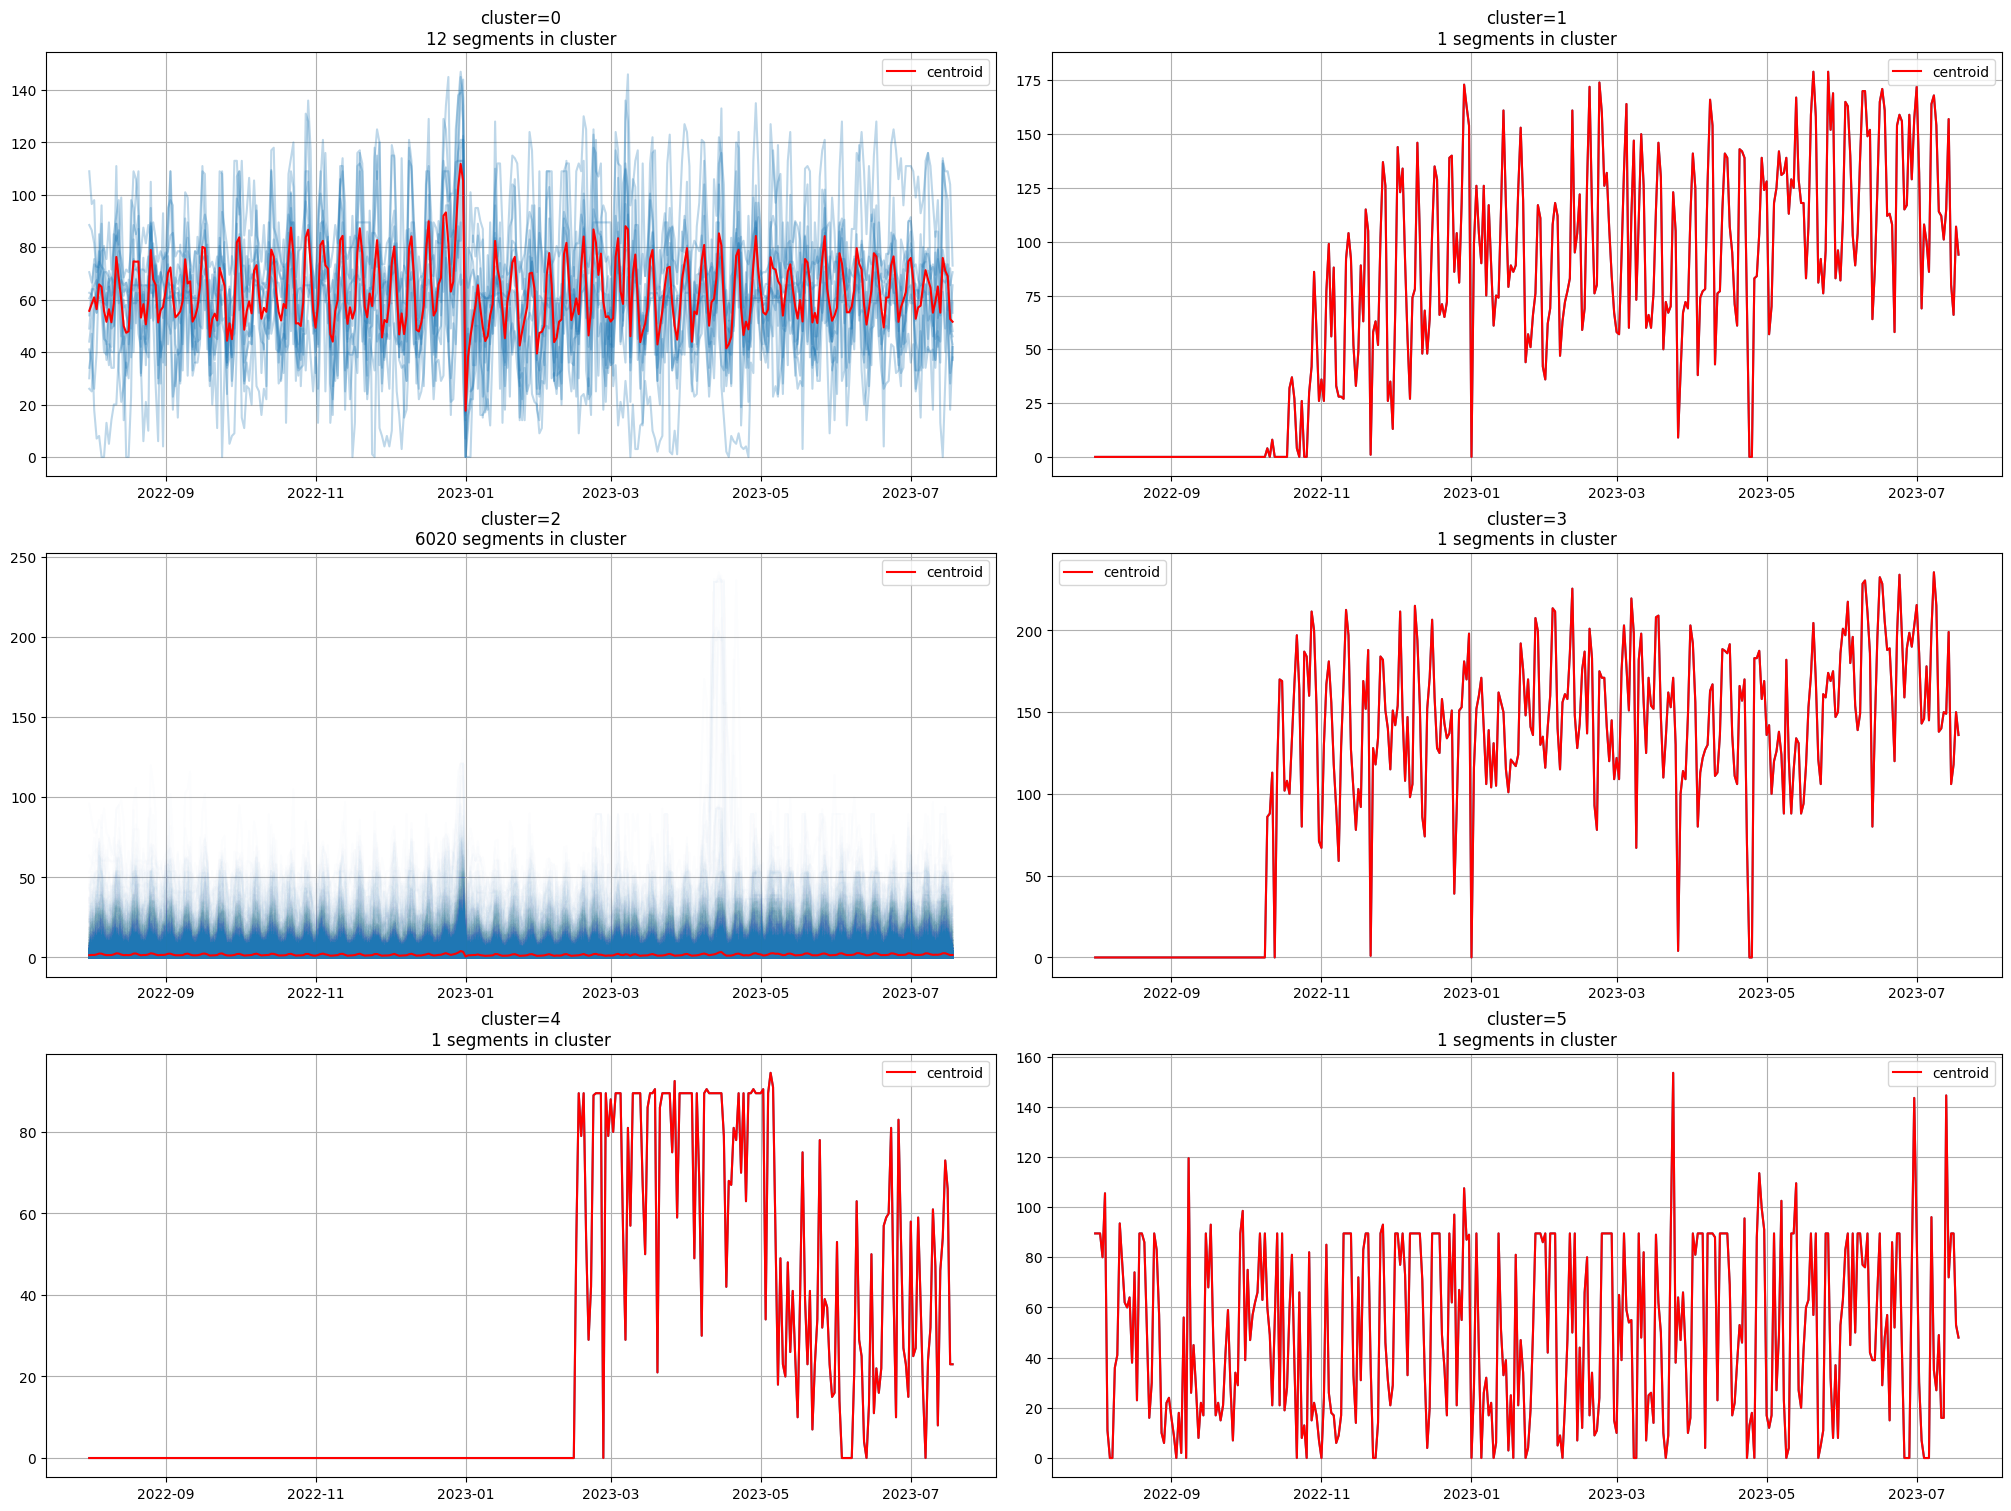

In [38]:
plot_clusters(ts, segment2cluster, centroids)

In [43]:
display(segment2cluster.values())

dict_values([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [44]:
 display(ts)

segment    16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  
...                                                       ...                  
2023-07-14                                                  0                  
2023-07-15                                                  0                  
2023-07-16                                                  0                  
2023-07-17                                                  0                  
2023-07-18                                                  0                  

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-02  c559da2ba967eb820766939a658022c8   
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-04  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   
...                                      ...   
2023-07-14  c559da2ba967eb820766939a658022c8   
2023-07-15  c559da2ba967eb820766939a658022c8   
2023-07-16  c559da2ba967eb820766939a658022c8   
2023-07-17  c559da2ba967eb820766939a658022c8   
2023-07-18  c559da2ba967eb820766939a658022c8   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf                0   
...                                      ...              ...   
2023-07-14  c74d97b01eae257e44aa9d5bade97baf                0   
2023-07-15  c74d97b01eae257e44aa9d5bade97baf                0   
2023-07-16  c74d97b01eae257e44aa9d5bade97baf                0   
2023-07-17  c74d97b01eae257e44aa9d5bade97baf                0   
2023-07-18  c74d97b01eae257e44aa9d5bade97baf                0   

segment                                                       \
feature                         pr_subcat_id pr_uom_id price   
timestamp                                                      
2022-08-01  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-02  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-03  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-04  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-05  130d817d8b3f616e97c555ec57946aec         1   0.0   
...                                      ...       ...   ...   
2023-07-14  130d817d8b3f616e97c555ec57946aec         1  76.5   
2023-07-15  130d817d8b3f616e97c555ec57946aec         1  77.5   
2023-07-16  130d817d8b3f616e97c555ec57946aec         1  78.0   
2023-07-17  130d817d8b3f616e97c555ec57946aec         1   0.0   
2023-07-18  130d817d8b3f616e97c555ec57946aec         1  80.0   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-02  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-03  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-04  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-05  c1f75cc0f7fe269dd0fd9bd5e24f9586   
...           

In [45]:
filtered_segment2cluster = {segment: cluster for segment, cluster in segment2cluster.items() if cluster == 2}

## Повторная кластеризация самого большого кластера

Этот шаг оказался почти бесполезным, потому что я освоил более тонкую настройку кластеризации. Теперь мне кажется неэффективным по времени дообучать новую модель на остатках от предыдущей. 

но опыт был интересный

В первом файле мы быерем сегмент №2 и делим его на новые сегменты. 

In [58]:
filtered_segments = [segment for segment, cluster in segment2cluster.items() if cluster == 2]

# Display the filtered list of segments
print(filtered_segments)

['16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3', '16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf8e0a9714b24415ce34', '16a5cdae362b8d27a1d8f8c7b78b4330_00661699f543753ec7e911a64b9fd2f6', '16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae507dc7f62acc8e5ed03a', '16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50a73a6f61838b49ff46', '16a5cdae362b8d27a1d8f8c7b78b4330_0169529ff660adcac9b7e354e0c4b882', '16a5cdae362b8d27a1d8f8c7b78b4330_01e4734745e97e52d3213449e1a05dd7', '16a5cdae362b8d27a1d8f8c7b78b4330_02713435f3587e2c81d8f6a9016763ea', '16a5cdae362b8d27a1d8f8c7b78b4330_028601bcf68af10f8be7422c22b5f6a6', '16a5cdae362b8d27a1d8f8c7b78b4330_033013f94a18c066e8b3d610bed34bee', '16a5cdae362b8d27a1d8f8c7b78b4330_040a02c2ad1561cbcfc9cae5b4c4b73b', '16a5cdae362b8d27a1d8f8c7b78b4330_0448c8afc036bb44c457d7e9edd74c50', '16a5cdae362b8d27a1d8f8c7b78b4330_04bbb07b1057b09d04209991f3eadd8f', '16a5cdae362b8d27a1d8f8c7b78b4330_050a8120e2a3b8751df8752fcc0323ef', '16a5cdae362b8d27a1d8f8c7b78b4330

In [63]:
data2 = data[data['segment'].isin(filtered_segments)].copy()
display(data2)

timestamp  pr_sales_type_id  price  target  \
0        2022-08-01                 0    0.0     0.0   
1        2022-08-01                 0    0.0     0.0   
2        2022-08-01                 0  435.0     1.0   
3        2022-08-01                 1  191.5     6.0   
4        2022-08-01                 0    0.0     0.0   
...             ...               ...    ...     ...   
2124667  2023-07-18                 1  143.2     5.0   
2124668  2023-07-18                 0    0.0     0.0   
2124669  2023-07-18                 0    0.0     0.0   
2124670  2023-07-18                 0   46.0     3.0   
2124671  2023-07-18                 0    0.0     0.0   

                               st_city_id                  st_division_code  \
0        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
1        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
2        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
3        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
4        c1f75cc0f7fe269dd0fd9bd5e24f9586  296bd0cc6e735f9d7488ebc8fbc19130   
...                                   ...                               ...   
2124667  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124668  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124669  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124670  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   
2124671  885fe656777008c335ac96072a45be15  296bd0cc6e735f9d7488ebc8fbc19130   

         st_type_format_id  st_type_loc_id  st_type_size_id  st_is_active  \
0                        1               2                8             1   
1                        1               2                8             1   
2                        1               2                8             1   
3                        1               2                8             1   
4                        1               2                8             1   
...                    ...             ...              ...           ...   
2124667                  1               1               12             1   
2124668                  1               1               12             1   
2124669                  1               1               12             1   
2124670                  1               1               12             1   
2124671                  1               1               12             1   

                              pr_group_id                         pr_cat_id  \
0        c74d97b01eae257e44aa9d5bade97baf  c559da2ba967eb820766939a658022c8   
1        c20ad4d76fe97759aa27a0c99bff6710  fb2fcd534b0ff3bbed73cc51df620323   
2        aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
3        6512bd43d9caa6e02c990b0a82652dca  e58cc5ca94270acaceed13bc82dfedf7   
4        aab3238922bcc25a6f606eb525ffdc56  9701a1c165dd9420816bfec5edd6c2b1   
...                                   ...                               ...   
2124667  aab3238922bcc25a6f606eb525ffdc56  28fc2782ea7ef51c1104ccf7b9bea13d   
2124668  aab3238922bcc25a6f606eb525ffdc56  3de2334a314a7a72721f1f74a6cb4cee   
2124669  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   
2124670  aab3238922bcc25a6f606eb525ffdc56  28fc2782ea7ef51c1104ccf7b9bea13d   
2124671  c74d97b01eae257e44aa9d5bade97baf  1bc0249a6412ef49b07fe6f62e6dc8de   

                             pr_subcat_id  pr_uom_id  is_holiday  \
0        130d817d8b3f616e97c555ec57946aec          1           0   
1        572494dd9d43f96629bddcbd4102f35f          1           0   
2        8afe22eeb3f3f68de994a3c60388858c          1           0   
3        c93c26cd49ea08e6b8984351d4164575          1           0   
4        a98ba70a6aaa1d3da549927a4ca79dfa         17           0   
...                                   ...        ...         ...   
2124667  b3e70d072fc648f6934c288e44f5c

In [65]:
data_in_etna_format2 = TSDataset.to_dataset(data2)
ts2 = TSDataset(data_in_etna_format2, freq="D")
ts2.head()

segment    16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3  \
feature                                                           is_holiday   
timestamp                                                                      
2022-08-01                                                  0                  
2022-08-02                                                  0                  
2022-08-03                                                  0                  
2022-08-04                                                  0                  
2022-08-05                                                  0                  

segment                                       \
feature                            pr_cat_id   
timestamp                                      
2022-08-01  c559da2ba967eb820766939a658022c8   
2022-08-02  c559da2ba967eb820766939a658022c8   
2022-08-03  c559da2ba967eb820766939a658022c8   
2022-08-04  c559da2ba967eb820766939a658022c8   
2022-08-05  c559da2ba967eb820766939a658022c8   

segment                                                        \
feature                          pr_group_id pr_sales_type_id   
timestamp                                                       
2022-08-01  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-02  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-03  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-04  c74d97b01eae257e44aa9d5bade97baf                0   
2022-08-05  c74d97b01eae257e44aa9d5bade97baf                0   

segment                                                       \
feature                         pr_subcat_id pr_uom_id price   
timestamp                                                      
2022-08-01  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-02  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-03  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-04  130d817d8b3f616e97c555ec57946aec         1   0.0   
2022-08-05  130d817d8b3f616e97c555ec57946aec         1   0.0   

segment                                       \
feature                           st_city_id   
timestamp                                      
2022-08-01  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-02  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-03  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-04  c1f75cc0f7fe269dd0fd9bd5e24f9586   
2022-08-05  c1f75cc0f7fe269dd0fd9bd5e24f9586   

segment                                                    ...  \
feature                     st_division_code st_is_active  ...   
timestamp                                                  ...   
2022-08-01  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-02  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-03  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-04  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   
2022-08-05  296bd0cc6e735f9d7488ebc8fbc19130            1  ...   

segment    fa7cdfad1a5aaf8370ebeda47a1ff1c3_ff62e7bffaca5e0ac8029cd29298c8c3  \
feature                                                         pr_subcat_id   
timestamp                                                                      
2022-08-01                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-02                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-03                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-04                   68f204f3838bfee4ada868b66e6a0814                  
2022-08-05                   68f204f3838bfee4ada868b66e6a0814                  

segment                                                       \
feature    pr_uom_id price                        st_city_id   
timestamp                                                      
2022-08-01        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-02        17   0.0  885fe656777008c335ac96072a45be15   
2022-08-03        17  23.8  885fe656777008c335ac96072a45be15   
2

In [66]:
model2 = EuclideanClustering()
model2.build_distance_matrix(ts2)

In [101]:
model2.build_clustering_algo(n_clusters=30, linkage="complete")
segment2cluster2 = model2.fit_predict()
segment2cluster2

/Users/BrightFuture/opt/anaconda3/envs/etna/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


{'16a5cdae362b8d27a1d8f8c7b78b4330_0045ebdb1069ff4b3dd3efe628c39cd3': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_005c52de11abaf8e0a9714b24415ce34': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_00661699f543753ec7e911a64b9fd2f6': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0094042bfeae507dc7f62acc8e5ed03a': 11,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0120fa9d93da50a73a6f61838b49ff46': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0169529ff660adcac9b7e354e0c4b882': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_01e4734745e97e52d3213449e1a05dd7': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_02713435f3587e2c81d8f6a9016763ea': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_028601bcf68af10f8be7422c22b5f6a6': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_033013f94a18c066e8b3d610bed34bee': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_040a02c2ad1561cbcfc9cae5b4c4b73b': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_0448c8afc036bb44c457d7e9edd74c50': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_04bbb07b1057b09d04209991f3eadd8f': 14,
 '16a5cdae362b8d27a1d8f8c7b78b4330_050

In [106]:
value_counts2 = {}
for value in segment2cluster2.values():
    if value in value_counts2:
        value_counts2[value] += 1
    else:
        value_counts2[value] = 1

print(value_counts2)

{14: 5564, 11: 212, 2: 21, 0: 66, 10: 56, 4: 8, 19: 1, 13: 28, 15: 1, 20: 12, 23: 1, 9: 9, 7: 2, 3: 5, 1: 6, 8: 4, 21: 1, 12: 3, 28: 1, 6: 3, 18: 1, 27: 1, 24: 1, 25: 4, 17: 1, 5: 2, 29: 1, 22: 3, 26: 1, 16: 1}


KeyError: (6, 'target')

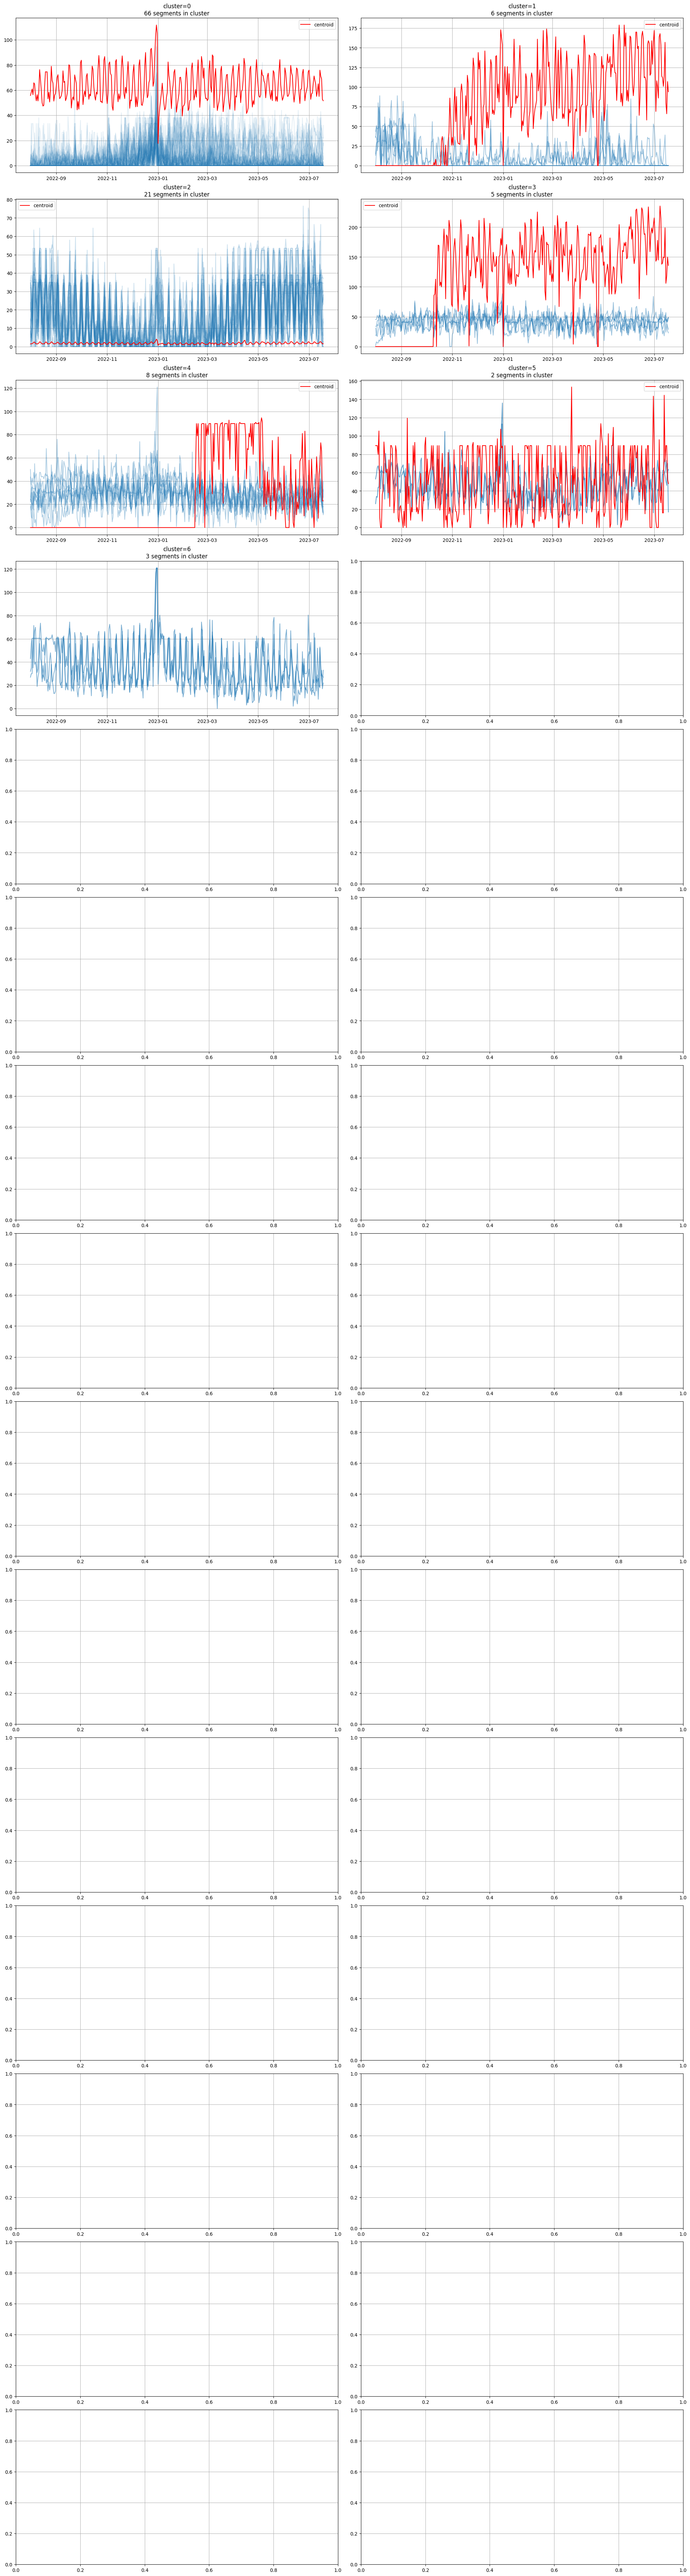

In [87]:
plot_clusters(ts2, segment2cluster2, centroids)

In [88]:
display(segment2cluster2.values())

dict_values([14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 2, 14, 0, 14, 14, 10, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 10, 14, 14, 14, 11, 11, 14, 14, 19, 14, 14, 14, 11, 10, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 11, 14, 14, 14, 15, 14, 14,

In [81]:
segment2cluster2 = {k: int(v) for k, v in segment2cluster.items()}

# Specify the file path where you want to save the dictionary
file_path = 'segment2cluster2.json'

# Open the file in write mode and save the dictionary as JSON
with open(file_path, 'w') as json_file:
    json.dump(segment2cluster2, json_file)

print(f'Saved the dictionary to {file_path}')

Saved the dictionary to segment2cluster2.json


## Кластеризация 3й ступени! 

А теперь мы делаем еще один раунд кластеризации, но теперь уже по первой категории. А потом еще это все сводить придется... 

In [78]:
filtered_segments2 = [segment for segment, cluster in segment2cluster2.items() if cluster == 0]

print(filtered_segments2)

['16a5cdae362b8d27a1d8f8c7b78b4330_62d4af457ba2540ce0898a211c0cd17a', '16a5cdae362b8d27a1d8f8c7b78b4330_c0e3f3bd815a862433bc3399c487926b', '16a5cdae362b8d27a1d8f8c7b78b4330_ced0c1a84924c982a6403870c54b99ca', '42a0e188f5033bc65bf8d78622277c4e_c0e3f3bd815a862433bc3399c487926b', '42a0e188f5033bc65bf8d78622277c4e_ced0c1a84924c982a6403870c54b99ca', '42a0e188f5033bc65bf8d78622277c4e_d5bfeecaaa47887a4b92d17fa55c2e18', '6364d3f0f495b6ab9dcf8d3b5c6e0b01_c0e3f3bd815a862433bc3399c487926b', 'c81e728d9d4c2f636f067f89cc14862c_62d4af457ba2540ce0898a211c0cd17a', 'f7e6c85504ce6e82442c770f7c8606f0_4695acecbef4734453cf9bc0be67ffe4', 'f7e6c85504ce6e82442c770f7c8606f0_4b083e10f6cd2f4360c5425d05be6386', 'fa7cdfad1a5aaf8370ebeda47a1ff1c3_c0e3f3bd815a862433bc3399c487926b', 'fa7cdfad1a5aaf8370ebeda47a1ff1c3_d5bfeecaaa47887a4b92d17fa55c2e18']
